In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('data.csv')
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [131]:
grouped_df = df.groupby('Дата')['Количество'].sum()

print(grouped_df)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64


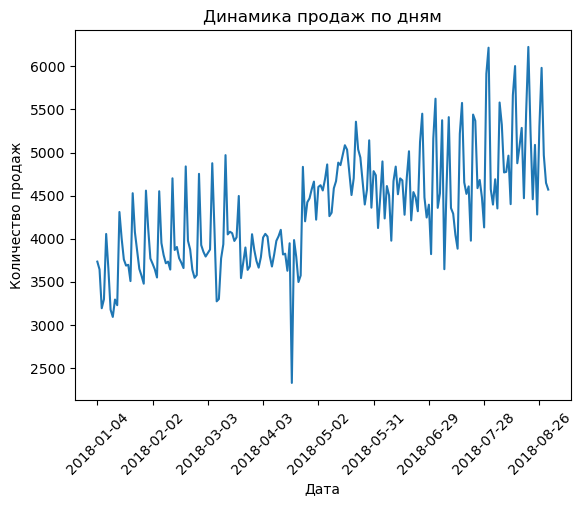

In [71]:
import matplotlib.pyplot as plt

grouped_df.plot(kind='line')

plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('Динамика продаж по дням')
plt.xticks(rotation=45)

plt.show()

In [ ]:
График отображает изменение количества продаж во времени за первые 8 месяцев 2018 года
Наблюдается общая тенденция к колебаниям количества продаж вокруг среднего значения. 
Нет ярко выраженного устойчивого роста или падения продаж за весь период.
Визуально можно заметить наличие сезонных колебаний. Количество продаж периодически увеличивается и уменьшается, 
что может быть связано с различными факторами, такими как сезонность спроса на продукт.
На графике присутствуют как пиковые значения (дни с наибольшим количеством продаж), 
так и провалы (дни с наименьшим количеством продаж). 
Также на графике присутствует значительный уровень шума.

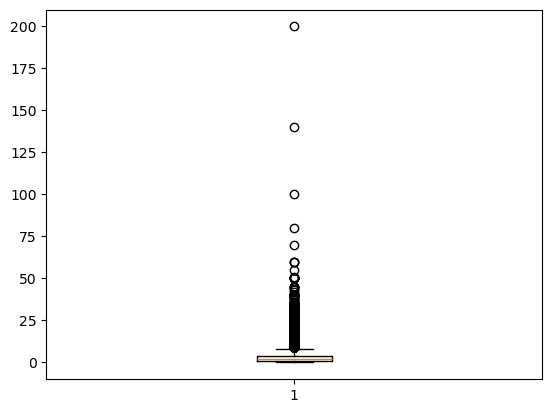

              Дата  Склад   Контрагент Номенклатура  Количество
218822  2018-06-28      1  address_208    product_0         200


In [28]:
import matplotlib.pyplot as plt
plt.boxplot(df['Количество'])
plt.show()

Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

if not outliers.empty:
    max_outlier = outliers['Количество'].max()
    print(df[df['Количество'] == max_outlier])
else:
    print("Выбросы не найдены")

z_scores = np.abs((df['Количество'] - df['Количество'].mean()) / df['Количество'].std())
threshold = 3
outliers = df[z_scores > threshold]

In [34]:
df['Дата'] = pd.to_datetime(df['Дата'])

df_filtered = df[(df['Дата'].dt.dayofweek == 2) & 
                ((df['Дата'].dt.month == 6) | 
                 (df['Дата'].dt.month == 7) | 
                 (df['Дата'].dt.month == 8)) &
                (df['Склад'] == 3)]

grouped = df_filtered.groupby(['Номенклатура'])['Количество'].sum().reset_index()

top_product = grouped.sort_values('Количество', ascending=False).iloc[0]

print("Топовый товар на складе №3 по средам за июнь, июль, август:")
print(top_product)

Топовый товар на складе №3 по средам за июнь, июль, август:
Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


In [135]:
df_temp = pd.read_csv('temp.csv')
print(df_temp.head())

        Дата      T
0  2018-8-31   8,20
1  2018-8-31   9,60
2  2018-8-31  11,30
3  2018-8-31  12,30
4  2018-8-31  13,20


In [137]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Дата    1918 non-null   object
 1   T       1918 non-null   object
dtypes: object(2)
memory usage: 30.1+ KB


In [161]:
print(df_temp.head())

        Дата     T
0  2018-8-31   8.2
1  2018-8-31   9.6
2  2018-8-31  11.3
3  2018-8-31  12.3
4  2018-8-31  13.2


In [141]:
df_temp['T'] = df_temp['T'].str.replace(',', '.').astype(float)

In [165]:
df_avg_temp = df_temp.groupby('Дата')['T'].mean().reset_index()

print(df_avg_temp.head())

        Дата        T
0  2018-1-10  -1.4875
1  2018-1-11  -9.4750
2  2018-1-12 -14.9750
3  2018-1-13 -23.9625
4  2018-1-14 -24.9500


In [167]:
df_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Дата    240 non-null    object 
 1   T       240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [179]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

# Форматируем даты в новый формат
df['Дата'] = df['Дата'].dt.strftime('%Y-%m-%d')

print(df)

              Дата  Склад   Контрагент Номенклатура  Количество
0       2018-01-04      1    address_0    product_0           4
1       2018-01-04      1    address_0    product_1           4
2       2018-01-04      1    address_0    product_2           5
3       2018-01-04      1    address_0    product_3          10
4       2018-01-04      1    address_0    product_4           2
...            ...    ...          ...          ...         ...
301350  2018-08-31      5  address_173   product_15           0
301351  2018-08-31      5  address_173   product_17           1
301352  2018-08-31      5  address_173   product_18           1
301353  2018-08-31      5  address_173   product_19           0
301354  2018-08-31      5  address_173   product_20           2

[301355 rows x 5 columns]


In [181]:
df_avg_temp['Дата'] = pd.to_datetime(df_avg_temp['Дата'], format='%Y-%m-%d')

# Форматируем даты в новый формат
df_avg_temp['Дата'] = df_avg_temp['Дата'].dt.strftime('%Y-%m-%d')

print(df_avg_temp)

           Дата        T
0    2018-01-10  -1.4875
1    2018-01-11  -9.4750
2    2018-01-12 -14.9750
3    2018-01-13 -23.9625
4    2018-01-14 -24.9500
..          ...      ...
235  2018-08-05  21.2125
236  2018-08-06  21.2250
237  2018-08-07  21.7375
238  2018-08-08  24.4000
239  2018-08-09  27.0500

[240 rows x 2 columns]


In [183]:
merged_df = pd.merge(grouped_df, df_avg_temp, on='Дата')


In [185]:
print(merged_df.head())  # Выводим первые несколько строк
print(merged_df.shape)  # Выводим размер таблицы (число строк и столбцов)


         Дата  Количество        T
0  2018-01-04        3734 -14.0750
1  2018-01-05        3643 -16.8625
2  2018-01-06        3193 -13.3000
3  2018-01-07        3298 -12.7500
4  2018-01-09        4055  -6.2500
(205, 3)


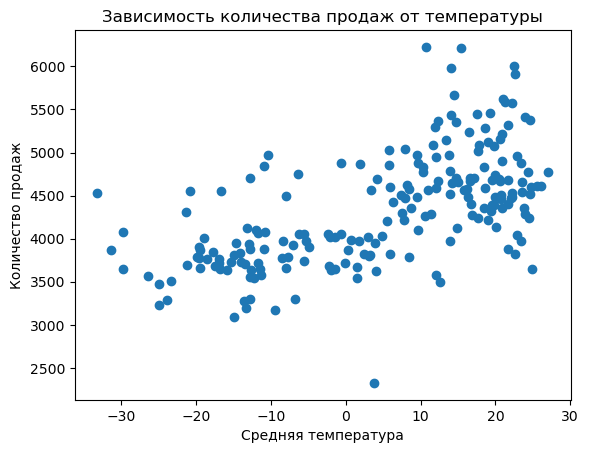

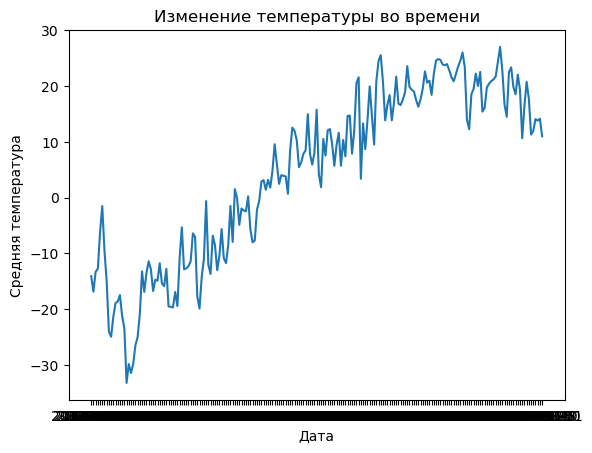

In [191]:
plt.scatter(merged_df['T'], merged_df['Количество'])
plt.xlabel('Средняя температура')
plt.ylabel('Количество продаж')
plt.title('Зависимость количества продаж от температуры')
plt.show()

# Динамика изменения температуры во времени
plt.plot(merged_df['Дата'], merged_df['T'])
plt.xlabel('Дата')
plt.ylabel('Средняя температура')
plt.title('Изменение температуры во времени')
plt.show()